# (sFigure13)-Analysis of Correlations Among T Cell Subtype Frequencies.

In [1]:
import omicverse as ov
import scanpy as sc
import pandas as pd
import numpy as np


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [2]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
import anndata as ad
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')


In [4]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata = ad.concat([adata_CD8,adata_CD4])
adata
CD4_dict = dict(zip(adata_CD4.obs['Subcelltype_ID_type'].cat.categories, adata_CD4.uns['Subcelltype_colors']))
CD8_dict = dict(zip(adata_CD8.obs['Subcelltype_ID_type'].cat.categories, adata_CD8.uns['Subcelltype_colors']))
CD4_dict.update(CD8_dict)
label_colors = CD4_dict
label_colors

{'C1.CD4.Tn': '#BCCE85',
 'C6.CD4.ADSL+.Tn': '#81B330',
 'C2.CD4.TNF+.T': '#249F3A',
 'C5.CD4.TMP1+.Tm': '#0A5D2F',
 'C4.CD4.CAPG+CREM-.Tm': '#89428F',
 'C3.CD4.CAPG+.Tm': '#c69bc6',
 'C9.CD4.IL26+.Th17': '#F2BC1D',
 'C7.CD4.IL21+.Tfh': '#6BBBDA',
 'C8.CD4.TOX2+.Tfh': '#31829F',
 'C10.CD4.LAG3+.Treg': '#D41661',
 'C11.CD4.TNFRSF9+.Treg': '#4D4F95',
 'C1.CD8.GZMK+.Tn': '#91C79D',
 'C2.CD8.GZMK+.early_Tem': '#8FC155',
 'C3.CD8.GZMK+.Tem': '#56AB56',
 'C4.CD8.CXCL13+.Termianl_Tex': '#2D5C33',
 'C5.CD8.FOS+JUN+.T-early_response': '#F0C3C3',
 'C6.CD8.FOS+IL7R+.T-early_response': '#E07370',
 'C7.CD8.ISG+.T': '#CB3E35',
 'C8.CD8.MAIT': '#A22E2A',
 'C10.CD8.ZNF683+CXCR6-.Trm': '#347862',
 'C9.CD8.ZNF683+CXCR6+.Trm': '#6BBBA0',
 'C12.CD8.ZNF683-CXCR6+.Trm': '#81C0DD',
 'C11.CD8.KLRD1+TYROBP+.NK-like': '#3E8CB1'}

In [5]:
adata

AnnData object with n_obs × n_vars = 13000 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

In [6]:
counts = adata.obs.groupby('Group_number')['Subcelltype_ID_type'].value_counts(normalize=True).mul(100)
counts_df = counts.reset_index(name='Percentage')
counts_df

,Group_number,Subcelltype_ID_type,Percentage
0,DYM,C9.CD8.ZNF683+CXCR6+.Trm,32.978723
1,DYM,C1.CD4.Tn,10.520095
2,DYM,C10.CD8.ZNF683+CXCR6-.Trm,7.919622
3,DYM,C5.CD4.TMP1+.Tm,6.028369
4,DYM,C3.CD4.CAPG+.Tm,5.555556
...,...,...,...
248,XYM,C3.CD8.GZMK+.Tem,1.312336
249,XYM,C9.CD4.IL26+.Th17,1.246719
250,XYM,C7.CD8.ISG+.T,1.246719
251,XYM,C6.CD8.FOS+IL7R+.T-early_response,0.590551


C4.CD8.CXCL13+.Termianl_Tex
C1.CD8.GZMK+.Tn
C2.CD8.GZMK+.early_Tem
C7.CD4.IL21+.Tfh
C8.CD4.TOX2+.Tfh
C1.CD4.Tn
C6.CD4.ADSL+.Tn
C10.CD4.LAG3+.Treg
C11.CD4.TNFRSF9+.Treg
C3.CD4.CAPG+.Tm
C8.CD8.MAIT
C9.CD4.IL26+.Th17
C10.CD8.ZNF683+CXCR6-.Trm
C5.CD8.FOS+JUN+.T-early_response
C7.CD8.ISG+.T
C9.CD8.ZNF683+CXCR6+.Trm
C11.CD8.KLRD1+TYROBP+.NK-like
C5.CD4.TMP1+.Tm
C12.CD8.ZNF683-CXCR6+.Trm
C2.CD4.TNF+.T
C4.CD4.CAPG+CREM-.Tm
C3.CD8.GZMK+.Tem
C6.CD8.FOS+IL7R+.T-early_response


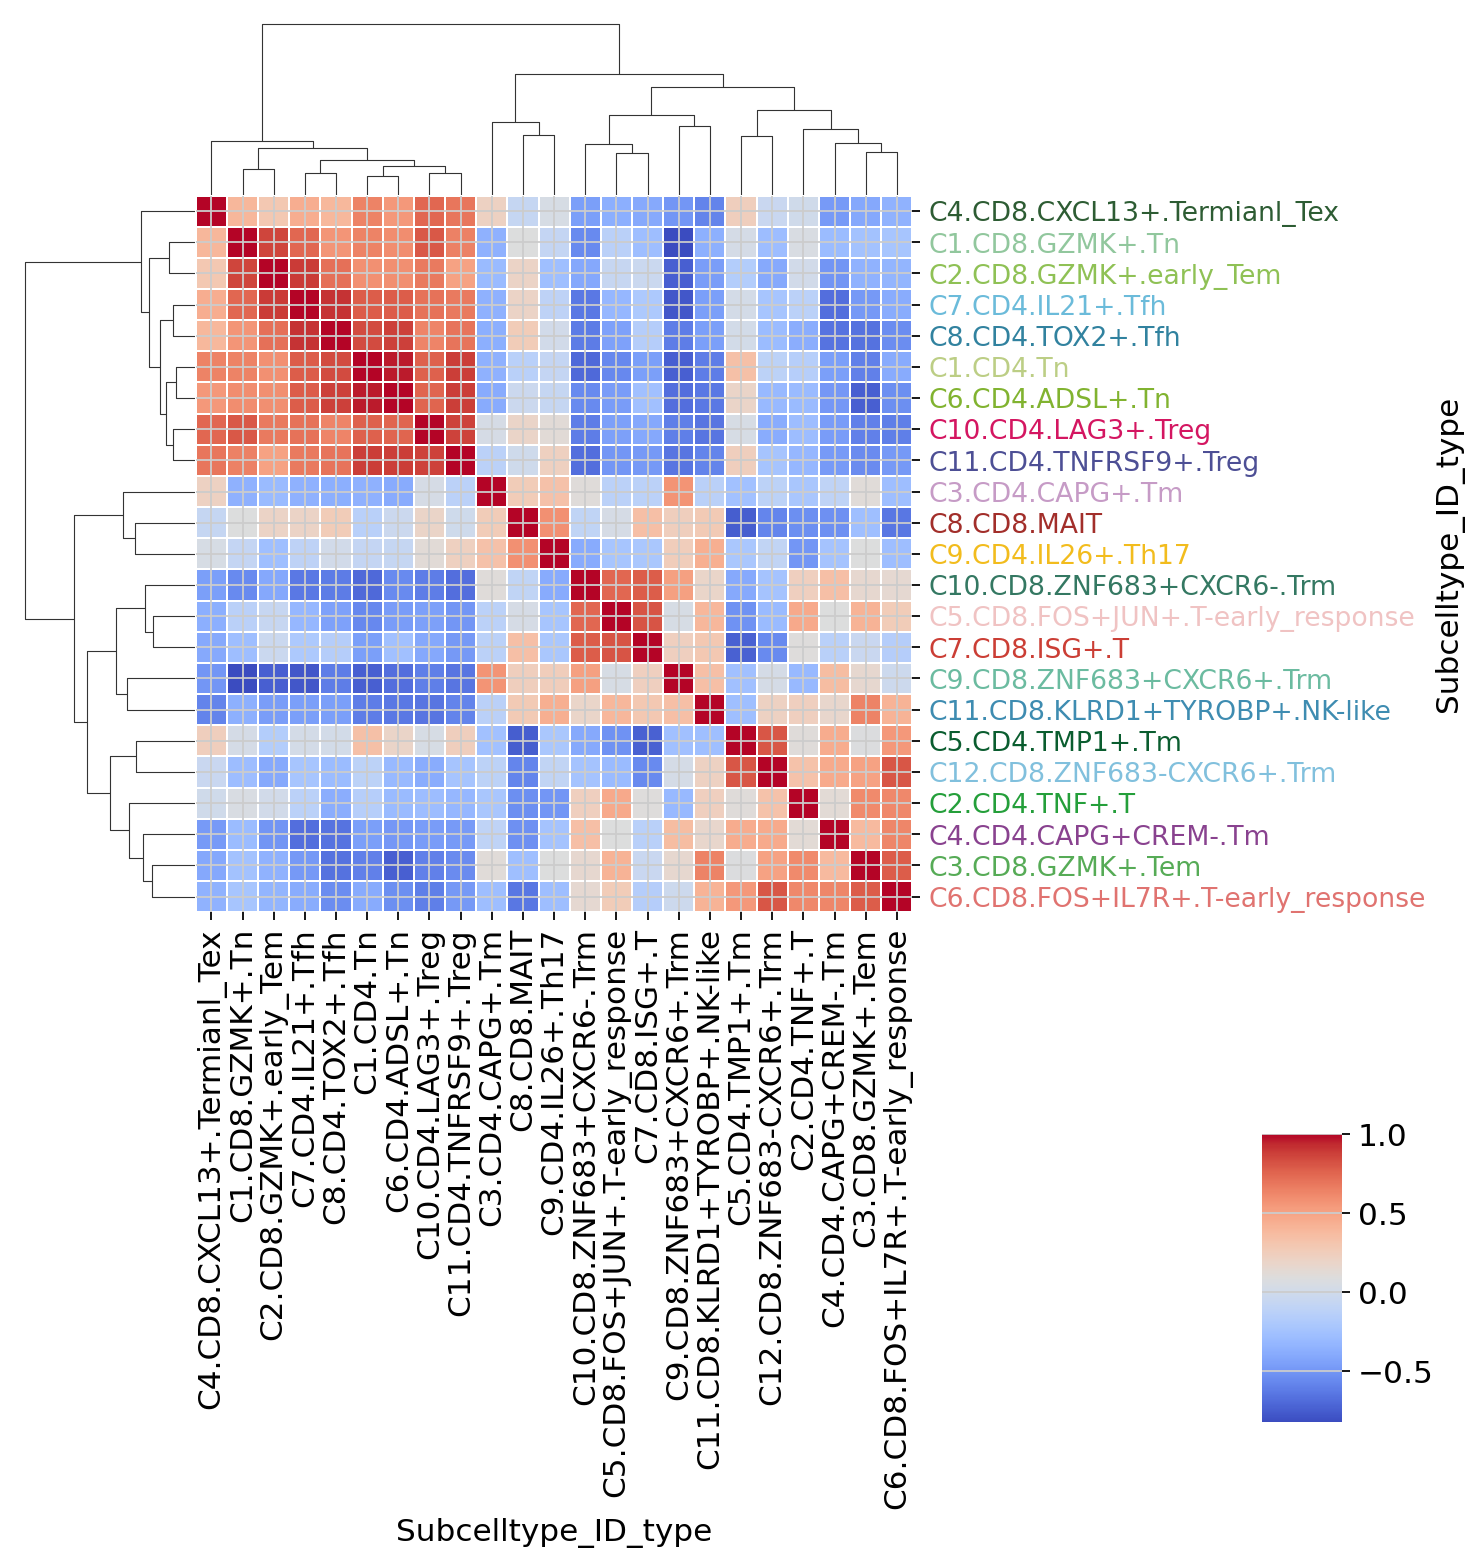

In [7]:
pivot_table = counts_df.pivot(index='Group_number', columns='Subcelltype_ID_type', values='Percentage').fillna(0)
correlation_matrix = pivot_table.corr()
import seaborn as sns
g = sns.clustermap(correlation_matrix, 
               method='average', 
               metric='euclidean', 
               cmap='coolwarm', 
               figsize=(10, 10),
               linewidths=.05, cbar_pos=(0.8, 0.1, 0.05, 0.18),
               annot=False)



for label in g.ax_heatmap.get_yticklabels():
    label_text = label.get_text()
    print(label_text)
    if label_text in label_colors:
        label.set_color(label_colors[label_text])
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize='12') 
plt.savefig("Gastric/Figure/sFigure13/sFigure13_A.png",dpi=300,bbox_inches = 'tight')

plt.show()

In [8]:
pivot_table.columns 

CategoricalIndex(['C1.CD4.Tn', 'C1.CD8.GZMK+.Tn', 'C2.CD4.TNF+.T',
                  'C2.CD8.GZMK+.early_Tem', 'C3.CD4.CAPG+.Tm',
                  'C3.CD8.GZMK+.Tem', 'C4.CD4.CAPG+CREM-.Tm',
                  'C4.CD8.CXCL13+.Termianl_Tex', 'C5.CD4.TMP1+.Tm',
                  'C5.CD8.FOS+JUN+.T-early_response', 'C6.CD4.ADSL+.Tn',
                  'C6.CD8.FOS+IL7R+.T-early_response', 'C7.CD4.IL21+.Tfh',
                  'C7.CD8.ISG+.T', 'C8.CD4.TOX2+.Tfh', 'C8.CD8.MAIT',
                  'C9.CD4.IL26+.Th17', 'C9.CD8.ZNF683+CXCR6+.Trm',
                  'C10.CD4.LAG3+.Treg', 'C10.CD8.ZNF683+CXCR6-.Trm',
                  'C11.CD4.TNFRSF9+.Treg', 'C11.CD8.KLRD1+TYROBP+.NK-like',
                  'C12.CD8.ZNF683-CXCR6+.Trm'],
                 categories=['C1.CD4.Tn', 'C1.CD8.GZMK+.Tn', 'C2.CD4.TNF+.T', 'C2.CD8.GZMK+.early_Tem', ..., 'C10.CD8.ZNF683+CXCR6-.Trm', 'C11.CD4.TNFRSF9+.Treg', 'C11.CD8.KLRD1+TYROBP+.NK-like', 'C12.CD8.ZNF683-CXCR6+.Trm'], ordered=False, dtype='category', nam

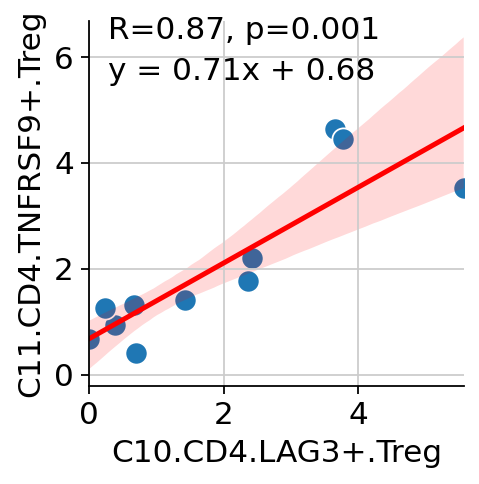

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


celltype_1 = "C10.CD4.LAG3+.Treg"
celltype_2 = "C11.CD4.TNFRSF9+.Treg"

x = pivot_table[celltype_1]
y = pivot_table[celltype_2]

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(3, 3)) 
sns.scatterplot(x=x, y=y, s=100)  

sns.regplot(x=x, y=y, scatter=False, color='red', scatter_kws={'s': 100},ci=90)

coefficients = np.polyfit(x, y, 1)  
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'

plt.text(.05, .95, f'R={r:.2f}, p={p:.3f}', transform=plt.gca().transAxes)
plt.text(.05, .90, equation, transform=plt.gca().transAxes, verticalalignment='top')

#plt.title('Scatter plot with fit line, R value and p value')
plt.xlabel(celltype_1)
plt.ylabel(celltype_2)

sns.despine()
plt.savefig("Gastric/Figure/sFigure13/sFigure13_B.png",dpi=300,bbox_inches = 'tight')

plt.show()


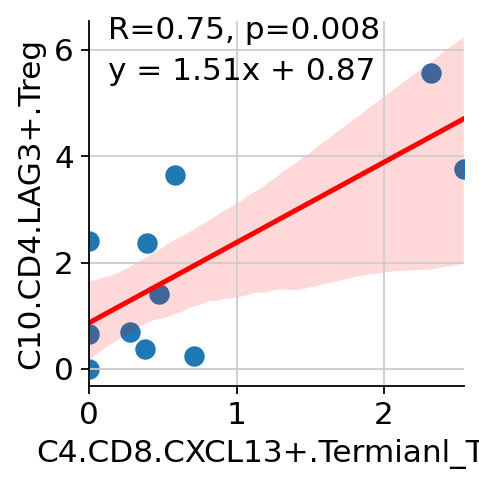

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


celltype_1 = 'C4.CD8.CXCL13+.Termianl_Tex'
celltype_2 = "C10.CD4.LAG3+.Treg"
x = pivot_table[celltype_1]
y = pivot_table[celltype_2]

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(3, 3)) 
sns.scatterplot(x=x, y=y, s=100)  

sns.regplot(x=x, y=y, scatter=False, color='red', scatter_kws={'s': 100},ci=90)

coefficients = np.polyfit(x, y, 1)  
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'

plt.text(.05, .95, f'R={r:.2f}, p={p:.3f}', transform=plt.gca().transAxes)
plt.text(.05, .90, equation, transform=plt.gca().transAxes, verticalalignment='top')

#plt.title('Scatter plot with fit line, R value and p value')
plt.xlabel(celltype_1)
plt.ylabel(celltype_2)

sns.despine()
plt.savefig("Gastric/Figure/sFigure13/sFigure13_C.png",dpi=300,bbox_inches = 'tight')

plt.show()


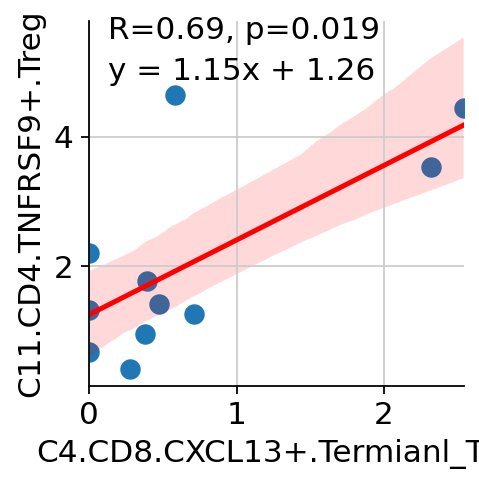

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

celltype_1 = 'C4.CD8.CXCL13+.Termianl_Tex'
celltype_2 = "C11.CD4.TNFRSF9+.Treg"
x = pivot_table[celltype_1]
y = pivot_table[celltype_2]

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(3, 3)) 
sns.scatterplot(x=x, y=y, s=100)  

sns.regplot(x=x, y=y, scatter=False, color='red', scatter_kws={'s': 100},ci=90)

coefficients = np.polyfit(x, y, 1)  
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'

plt.text(.05, .95, f'R={r:.2f}, p={p:.3f}', transform=plt.gca().transAxes)
plt.text(.05, .90, equation, transform=plt.gca().transAxes, verticalalignment='top')

#plt.title('Scatter plot with fit line, R value and p value')
plt.xlabel(celltype_1)
plt.ylabel(celltype_2)

sns.despine()
plt.savefig("Gastric/Figure/sFigure13/sFigure13_D.png",dpi=300,bbox_inches = 'tight')

plt.show()


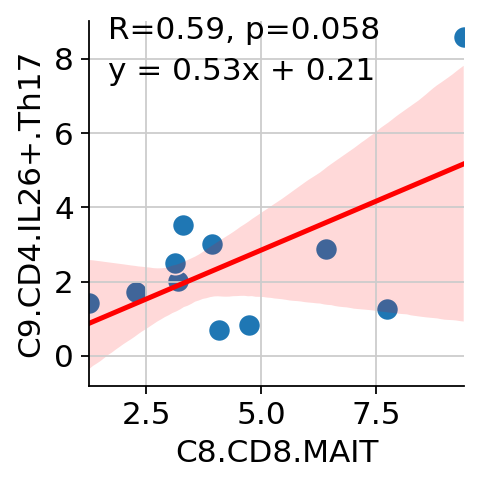

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

celltype_1 = "C8.CD8.MAIT"
celltype_2 = "C9.CD4.IL26+.Th17"

x = pivot_table[celltype_1]
y = pivot_table[celltype_2]

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(3, 3)) 
sns.scatterplot(x=x, y=y, s=100)  

sns.regplot(x=x, y=y, scatter=False, color='red', scatter_kws={'s': 100},ci=90)

coefficients = np.polyfit(x, y, 1)  
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'

plt.text(.05, .95, f'R={r:.2f}, p={p:.3f}', transform=plt.gca().transAxes)
plt.text(.05, .90, equation, transform=plt.gca().transAxes, verticalalignment='top')

#plt.title('Scatter plot with fit line, R value and p value')
plt.xlabel(celltype_1)
plt.ylabel(celltype_2)

sns.despine()
plt.savefig("Gastric/Figure/sFigure13/sFigure13_E.png",dpi=300,bbox_inches = 'tight')

plt.show()
